# Week 5: Market Risk

### What is market risk?

Market risk for financial markets is the impact of unanticipated price changes
on the value of an organization’s position in instruments, commodities, and
other contracts.

In commodity markets there is sometimes considered a more physical type of
market risk called volumetric risk.

This risk might be triggered by a complex contract such as a CDO or a spark
spread tolling agreement in power and energy markets.

Here we will assume that volumetric changes are physical in the sense that a
electricity system operator governs a physical process such as idling an electric
generation plant.

ASSUMPTION: The “position” is considered exogenous to the price stochastic
process. This implies that changes in position do not affect the liquidity of the
market relative to that position.

### Try this...
Suppose you are in charge of the project to manage the contracting for electricity and steel at your specialty steel company. Your company and industry have traditionally used tolling agreements to manage the steel-power spread, both from power input and steel output points of view.
 
### 1. Look up a tolling agreement and summarize its main components.


## tolling agreement
In the electric power to steel tolling agreement a steel buyer supplies power to
a steel plant and receives from the plant supplier an amount of steel based on
an assumed power-to-steel transformation rate at an agreed cost.


**Owning (or renting) a power plant gives a trader the option of converting fuel into power. If power prices are sufficiently high, a power plant can burn fuel to produce electricity at a profit. Otherwise, the trader will usually leave the power plant inactive. This is very similar to the behavior of financial option contracts.**

Prices of power and steel

Transformation rate

Agree cost

### 2. What are the input and output decisions in this kind of agreement?

Decisions include

Amount of power (MWh)

Amount of steel (tons)

Steel (tons) / Power (MWh) transformation rate

Start-up, idle, and shut-down timing and costs

Plant production costs and optimal scheduling


### Lecture:
Google's always fun. I found an electric power to steel tolling agreement. It's an old US steel agreement that was discovered by lawyers in an acquisition, a transaction. That's why it was made available online. It had to be publicly available.
A steel buyer supplies power to a steel plant, receives from the plant supplier an amount of steel based on an assumed power-to-steel transformation rate. This is the spark spread, input electrons, output steel. And we're taking a view on the spread between the two. And that's the transformation rate at an agreed cost. So we have prices of power and steel, transformation rate, and we agree on a cost. Those are the pieces.
The decisions now include how much power, how much steel, how much tons of steel per megawatts of power, and in this case megawatt hours, transformation rate. And the hours could be specified as how long the power and at what time of day as well. So it can get a little complicated on the volume side.
Start-up, idle, shut-down timing, and costs are all included in a tolling agreement. And we often also call these in finance real options. Plant production costs, optimal scheduling, all part of the agreement. They're actually all agreed to. It's all put onto paper.
So what are we going to get to this week? We're going to measure risks using both historical and-- that's a historical simulation approach-- and parametric approaches. First we're going to let history speak for itself. And then we're going to apply very specific distributions, pull the parameters of those distributions out in terms of their means and standard deviations.
Remember, we did this exercise quite a while ago using fitdistr to provide that kind of fit. We also used the method of moments at that time. Now interpret the results relative to business decisions. That's our whole thing all the way through. And let's also try to visualize market risk.

In [4]:
getwd()

[1] "/Users/HAG/Desktop/Spring2020/FIN654/Weeks/w5"

In [7]:
install.packages("psych")

also installing the dependency ‘mnormt’

Warning message in install.packages("psych"):
“installation of package ‘mnormt’ had non-zero exit status”Warning message in install.packages("psych"):
“installation of package ‘psych’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [12]:
# Libraries
library(ggplot2)
library(IRdisplay)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [11]:
#library(psych)
#install.packages("GGally")

also installing the dependency ‘reshape’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## 4.3 Exercise: History Speaks

OK, let's dive right in. History speaks. This means we're going to get data. And the basic idea of risk measures that we're going to be building down the line and preparing for in this piece is both the value at risk and expected shortfall.
So keep that in mind. We're going to be actually building a metric using the data. And this will measure how risky this whole gambit of electricity to steel and that spread might be for your company and your project. We'll also eventually put together a portfolio, calculate losses, and with the loss distribution, get to those metrics. This is called a nonparametric approach, because we're using history and the distribution of prices at the front end of the steelmaking process and at the user end and the customer end of the steelmaking process as our market price indicators.

Well, let's get some data. We are going to be using a number of things throughout the sessions we'll have on market risk. Just to look at this, we'll be using mvtnorm. We'll be using QRM. We'll be using the psych library, and, of course, our beloved ggplot2 library.
But let's get started with something a little bit simpler. Let's read in a CSV file, a comma-separated variable file, from the working directory. And we have in this file dates and several risk factors. By a risk factor, we'll mean a contribution to the overall spread between electricity and steel. What are the risk factors that give rise to that? Way back, we would have called this **a taxonomy. And it is part of a taxonomy for risk.**

We're going to download the data. It's called eurostock. Strings this factors are called false in this. And that's going to be important for the data in this particular case. And then we look at the structure of the data just to get a feel for what is in there. And we see lots of companies. My goodness, they all look kind of German-based. We have a bank. We have Volkswagen. We have, oh, Allianz, an insurer with an asset manager. Got a lot of interesting companies here that we're going to choose from. We're going to choose two companies.
Now, what we're going to do is take this database. We're going to look at the first field itself, which in this case is a set of dates. And we see that it's a character field with strings that are formatted like dates, oh my goodness, all the way back to 1973. We're going to get a rather interesting history from these companies.

In [13]:
## Download the data
data.all <- read.csv("eurostock.csv",
stringsAsFactors = FALSE)
# This will convert string dates to
# date objects below
str(data.all) # Check the structure and look for dates

'data.frame':	6147 obs. of  24 variables:
 $ X              : chr  "1973-01-01" "1973-01-02" "1973-01-03" "1973-01-04" ...
 $ ALLIANZ.HLDG.  : num  156 156 161 162 164 ...
 $ COMMERZBANK    : num  147 147 149 152 152 ...
 $ DRESDNER.BANK  : num  18.4 18.4 18.8 18.9 18.9 ...
 $ BMW            : num  104 109 110 111 109 ...
 $ SCHERING       : num  36.9 37.4 37.8 37.9 37.4 ...
 $ BASF           : num  15 15.4 15.6 15.8 15.8 ...
 $ BAYER          : num  12.2 11.9 12.1 12.7 12.7 ...
 $ BAYERISCHE.VBK.: num  23.5 22.9 23.4 23.7 23.9 ...
 $ BAYER.HYPBK.   : num  23.4 23.2 23.3 23.5 23.4 ...
 $ DEGUSSA        : num  203 207 208 210 214 ...
 $ DEUTSCHE.BANK  : num  22.3 22.5 22.9 23 23.3 ...
 $ CONTINENTAL    : num  8.54 8.83 8.78 8.83 8.73 8.82 8.74 8.73 8.74 8.74 ...
 $ VOLKSWAGEN     : num  134 140 145 144 140 ...
 $ DAIMLER.BENZ   : num  17 17.6 17.8 17.8 17.7 ...
 $ HOECHST        : num  13.8 13.8 14.2 14.3 14.2 ...
 $ SIEMENS        : num  20.8 21.1 21.3 21.4 21.5 ...
 $ KARSTADT       :

In [17]:
str(row.names <- data.all$X) # We find that the first field X contains dates
length(row.names <- data.all$X) # We find that the first field X contains dates

 chr [1:6147] "1973-01-01" "1973-01-02" "1973-01-03" "1973-01-04" ...


[1] 6147

In [18]:
date <- as.Date(row.names) # convert string dates to date objects
str(date) #Always look at structure to be sure

 Date[1:6147], format: "1973-01-01" "1973-01-02" "1973-01-03" "1973-01-04" "1973-01-05" ...


In [19]:
rownames(data.all) <- date
head(data.all)

,X,ALLIANZ.HLDG.,COMMERZBANK,DRESDNER.BANK,BMW,SCHERING,BASF,BAYER,BAYERISCHE.VBK.,BAYER.HYPBK.,...,DAIMLER.BENZ,HOECHST,SIEMENS,KARSTADT,LINDE,THYSSEN,MANNESMANN,MAN,RWE,INDEX
1973-01-01,1973-01-01,155.51,147.41,18.40,103.97,36.88,14.96,12.24,23.47,23.40,...,16.97,13.77,20.76,359.55,135.95,67.47,84.97,117.92,11.68,536.36
1973-01-02,1973-01-02,155.51,147.41,18.40,109.05,37.44,15.43,11.95,22.92,23.22,...,17.59,13.77,21.06,359.96,136.89,68.41,86.51,118.78,11.87,545.43
1973-01-03,1973-01-03,160.58,149.14,18.80,109.83,37.79,15.61,12.10,23.45,23.34,...,17.79,14.22,21.29,361.99,139.59,67.47,87.75,124.95,12.03,552.46
1973-01-04,1973-01-04,162.27,152.05,18.91,110.81,37.86,15.85,12.71,23.66,23.49,...,17.81,14.32,21.44,369.32,142.21,71.62,88.71,124.95,11.95,556.14
1973-01-05,1973-01-05,164.30,152.05,18.89,109.44,37.44,15.75,12.74,23.87,23.40,...,17.73,14.23,21.48,368.50,143.71,71.24,88.63,127.29,12.03,557.44
1973-01-08,1973-01-08,164.30,152.25,18.99,109.05,37.79,15.80,12.74,24.07,23.46,...,17.70,14.19,21.48,366.88,143.77,70.77,89.01,125.34,11.91,555.51


We're going to take these row names, which is just X, just X. And we're going to create it as a date so that its format is now dates instead of character. That's the first thing we're going to do. And then we're going to dump this new character into the row names. And we will look at everything here now with head. And we're always going to look at head, sometimes tail. So we see stock prices, stock prices, or stock prices. OK, that looks good.

In [20]:
## Subset the data using a start and
## end date
start.date <- "1975-06-02"
end.date <- "1990-12-30"
# First column looks for filtered
# dates, second and third columns
# pull out prices
price <- data.all[start.date <= date &
date <= end.date, c("RWE", "THYSSEN")]
# We add a check to ensure that price
# is a matrix and that ncol will work
if (!is.matrix(price)) price <- rbind(price,
deparse.level = 0L)
str(price)

'data.frame':	4065 obs. of  2 variables:
 $ RWE    : num  8.96 9.2 9.16 9.2 9.36 9.24 9.12 9.08 9.04 8.99 ...
 $ THYSSEN: num  69.8 70.8 69.8 68.9 68.8 ...


In [21]:
head(price) # time series 

,RWE,THYSSEN
1975-06-02,8.96,69.82
1975-06-03,9.20,70.77
1975-06-04,9.16,69.82
1975-06-05,9.20,68.88
1975-06-06,9.36,68.79
1975-06-09,9.24,67.94


Then we're going to subset the data using a start and end date. So we're going to look at all start dates less than or equal to a date plus, and then it'll be this start date. All dates less than or equal to an end date for two companies, RWE and Thyssen.
RWE is German for the Rhine River Valley's version of an electricity company. It grew up along a river doing hydro first, but now it's a big fossil. And it's becoming less of a fossil company. They're much more into renewables now, according to German policy. Thyssen is a very large steel manufacturer that also manufactures lots of steel end products, including elevator parts as an example.
We then take the prices and ask the question, if the price is not a matrix, make price a matrix using rbind. Pull this off. Use a deparse.level. Don't worry about that, but do put it in. And now look at the structure of price.
Price now looks like a data frame, which is exactly where we want to be with 4,000 observations. These are daily observations across our two variables, RWE and Thyssen. You look at the head. And now we have what is called a time series object. We know it's a time series object because the row names through all of our machinations before appear, and then before this are now all dates, in this case, starting with 1975, because that was the date we wanted to start things with. And now we have all the prices from '75 forward for 4,000 dates.

In [22]:
(end.idx <- dim(price)[1])

[1] 4065

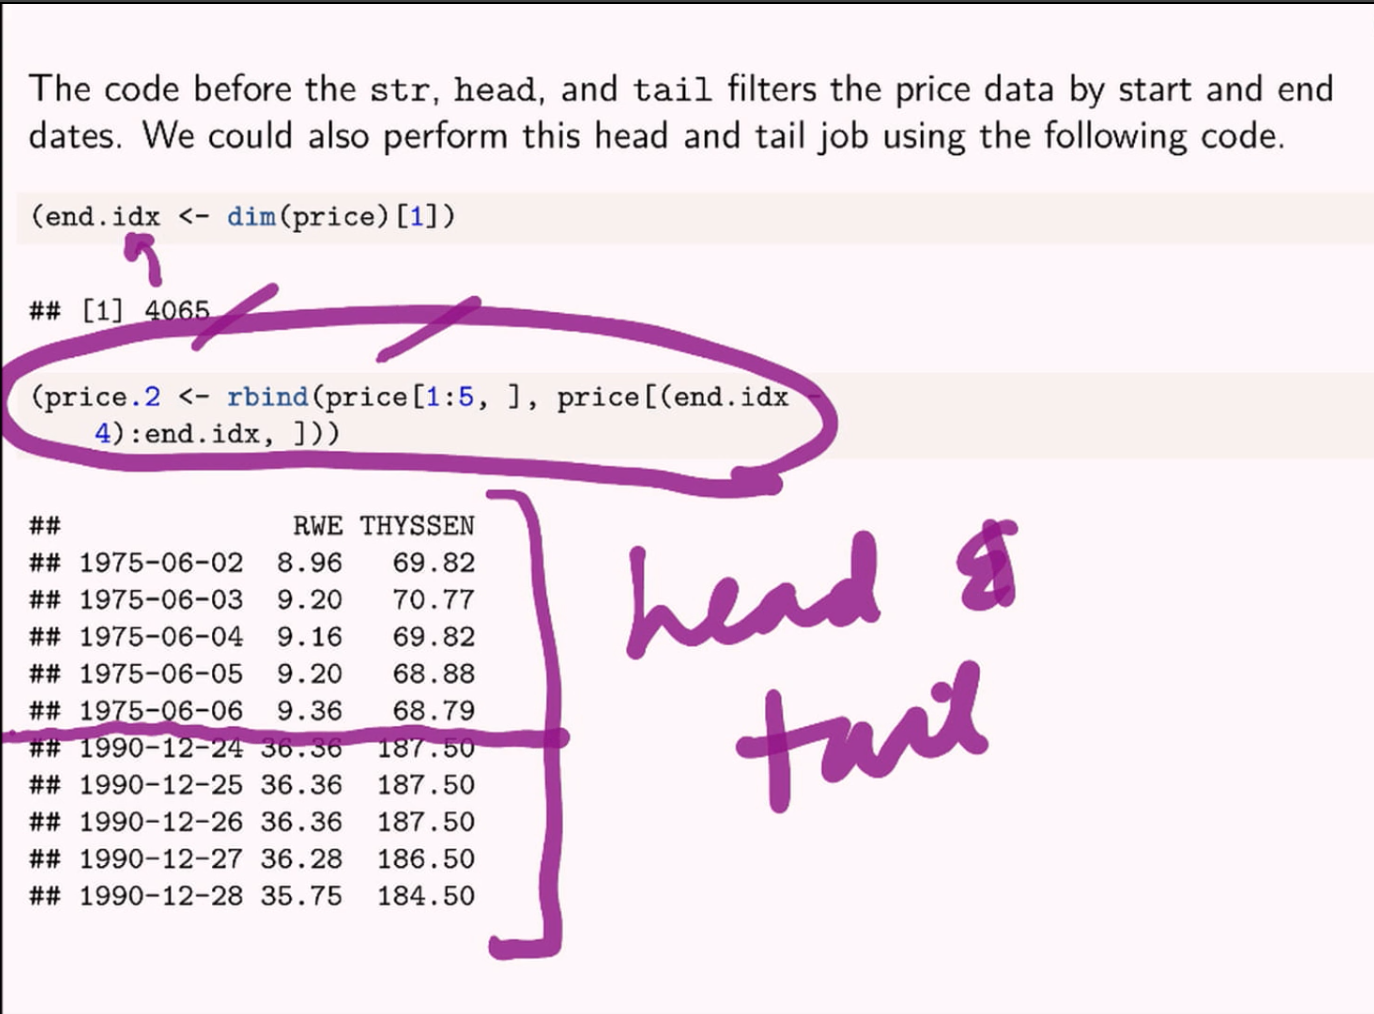

In [23]:
display_png(file = "Screen Shot 2020-02-06 at 3.10.01 PM.png")

In [24]:
(price.2 <- rbind(price[1:5, ], price[(end.idx - 4):end.idx, ]))

,RWE,THYSSEN
1975-06-02,8.96,69.82
1975-06-03,9.20,70.77
1975-06-04,9.16,69.82
1975-06-05,9.20,68.88
1975-06-06,9.36,68.79
1990-12-24,36.36,187.50
1990-12-25,36.36,187.50
1990-12-26,36.36,187.50
1990-12-27,36.28,186.50
1990-12-28,35.75,184.50


We have a couple of more housekeeping details to do. And these are all things that we could encase in a function so you don't ever have to worry about this again. One of the inputs to the function would be a start date and an end date, for example. Another one would be what data set are we using. So we can automate all of this. And all of this hard work could be placed in an automated function.
We're going to create an end index number, which in this case is 4,065 using dim again, using the first dimension of dim, which, remember, is the row. And then we're going to use this index to create price.2. And then we're going to print it out. And this will be one of our main pieces of work that we have.
So we're going to take prices from the first five, all columns, the first five rows, and row bind those with prices from the last several rows to create a version of head plus tail. And this is a clever way of looking at things. So you see what happened here. We have head plus tail.
So this is a pretty good tool, this routine of creating an end index, creating a new variable, and just pulling out the first five and the last five so we don't have to write head and tail anymore. And so we could write a function around this. We're going to give that to you as an assignment someday. Be very interesting.
OK, we have that. Now we're going to explore this data. Try this out. Bring in psych. And as the prefab scatterplot matrix, and this is the one, remember, that Edward Tufte, the visualizer that has pretty much recreated a lot of statistical visualization for us over the years, this is what he recommends. psych implements his recommendation. And this specific implementation is with pairs.panels.
We already have the price data all set up. We've looked at the head and tail. Now we're really going to explore the data. We're going to do a plot after pairs.panels of using the row names against the Thyssen price first. And then we're going to pop on top of that another plot using RWE. So let's look at what these expressions do for us. You try this right now. Thanks.